In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [314]:
dataset = pd.read_csv("./datasets/mobiles-wine-combined.csv")

In [315]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,E,F,G,H,I,J,K,L,M,Class_ID
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,0,0,0.0,0,0,0,0,0.0,0,0,...,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,6
2174,0,0,0.0,0,0,0,0,0.0,0,0,...,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,6
2175,0,0,0.0,0,0,0,0,0.0,0,0,...,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,6
2176,0,0,0.0,0,0,0,0,0.0,0,0,...,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,6


In [316]:
X = dataset.iloc[:, 0:33].values
y = dataset.iloc[:, 33].values

In [317]:
X, y

(array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.021e+03, 1.000e+00, 5.000e-01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [5.630e+02, 1.000e+00, 5.000e-01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 2, 2, ..., 6, 6, 6]))

In [318]:
# Row normalization
# for i, x in enumerate(X):
#     minVal = np.min(x)
#     norm_x = x - minVal
#     maxVal = np.max(norm_x)
#     norm_x /= maxVal
#     X[i] = norm_x
    
# Column normalization
for i in range(X.shape[1]):
    x = X[:, i]
    minVal = np.min(x)
    norm_x = x - minVal
    maxVal = np.max(norm_x)
    norm_x /= maxVal
    X[:, i] = norm_x

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Testing

In [320]:
K_VALUES = [(2 * i + 1) for i in range(1, 9)]
K_ACCURACY = []
for K in K_VALUES:
    match = 0
    total = 0
    for test_point_index, test_point in enumerate(X_test):
        distances_dict = Counter()
        class_count = Counter()

        for index, train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        for point_index, point in distances_dict.most_common()[-K:]:
            class_count[y_train[point_index]] += 1
        
        if class_count.most_common(1)[0][0] == y_test[test_point_index]:
            match += 1
        total += 1
    K_ACCURACY.append(match / total)

In [321]:
df = []
for i, value in enumerate(K_VALUES):
    df.append([value, K_ACCURACY[i]])
df = pd.DataFrame(df)
df.columns = ['K', 'Accuracy']
df

,K,Accuracy
0,3,0.408257
1,5,0.417431
2,7,0.405963
3,9,0.392202
4,11,0.422018
5,13,0.428899
6,15,0.428899
7,17,0.433486


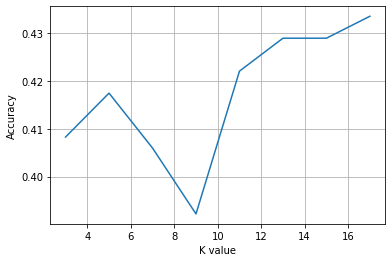

In [322]:
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(K_VALUES, K_ACCURACY)
plt.grid()
plt.show()